<a href="https://colab.research.google.com/github/ReipasMerenneito/ReipasMerenneito/blob/main/Defunciones_Totales_INEGI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muertes totales Jean

In [1]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

import plotly.express as px

In [3]:
'''## Lectura de datos 
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location 'https://github.com/ReipasMerenneito/ReipasMerenneito/blob/main/totalMortalidad_01.csv'
## Impresion de dimensiones'''

"## Lectura de datos \n!curl --remote-name      -H 'Accept: application/vnd.github.v3.raw'      --location 'https://github.com/ReipasMerenneito/ReipasMerenneito/blob/main/totalMortalidad_01.csv'\n## Impresion de dimensiones"

In [4]:
df=pd.read_excel("/content/drive/MyDrive/DCDP Módulo 1 Trabajo Final/Mortalidad Inegi total.xlsx")
df

,Entidad federativa de residencia habitual de la persona fallecida,Total,Hombres,Mujeres,No especificado,Total.1,Hombres.1,Mujeres.1,No especificado.1,Total.2,...,Mujeres.9,No especificado.9,Total.10,Hombres.10,Mujeres.10,No especificado.10,Total.11,Hombres.11,Mujeres.11,No especificado.11
0,Año,2010,2010,2010,2010,2011,2011,2011,2011,2012,...,2019,2019,2020,2020,2020,2020,2021,2021,2021,2021
1,Total,592018,332027,259669,322,590693,332646,257468,579,602354,...,325126,473,1086743,639277,446709,757,1122249,646825,474689,735
2,Aguascalientes,5177,2721,2449,7,4934,2679,2253,2,5267,...,3033,3,9548,5578,3968,2,9712,5457,4255,0
3,Baja California,15400,9561,5822,17,14922,9176,5736,10,14756,...,7837,1,32662,20190,12458,14,28596,17937,10655,4
4,Baja California Sur,2434,1478,954,2,2602,1523,1079,0,2739,...,1435,1,4867,2924,1943,0,5925,3605,2320,0
5,Campeche,3820,2231,1587,2,3736,2147,1587,2,3964,...,2195,1,7549,4430,3118,1,7509,4280,3225,4
6,Coahuila de Zaragoza,14593,8159,6432,2,14640,8345,6290,5,15200,...,8059,5,28190,16034,12149,7,23814,13362,10447,5
7,Colima,3223,1888,1334,1,3514,2051,1461,2,3717,...,1792,0,6057,3694,2363,0,7121,4271,2849,1
8,Chiapas,21721,12088,9631,2,21199,11702,9483,14,22411,...,12935,8,38908,22400,16503,5,39865,22329,17532,4
9,Chihuahua,25809,16861,8898,50,24121,15168,8939,14,22187,...,10118,4,39246,23657,15579,10,31716,18592,13110,14


In [5]:
total_df=df.copy()
total_df.head(9)



,Entidad federativa de residencia habitual de la persona fallecida,Total,Hombres,Mujeres,No especificado,Total.1,Hombres.1,Mujeres.1,No especificado.1,Total.2,...,Mujeres.9,No especificado.9,Total.10,Hombres.10,Mujeres.10,No especificado.10,Total.11,Hombres.11,Mujeres.11,No especificado.11
0,Año,2010,2010,2010,2010,2011,2011,2011,2011,2012,...,2019,2019,2020,2020,2020,2020,2021,2021,2021,2021
1,Total,592018,332027,259669,322,590693,332646,257468,579,602354,...,325126,473,1086743,639277,446709,757,1122249,646825,474689,735
2,Aguascalientes,5177,2721,2449,7,4934,2679,2253,2,5267,...,3033,3,9548,5578,3968,2,9712,5457,4255,0
3,Baja California,15400,9561,5822,17,14922,9176,5736,10,14756,...,7837,1,32662,20190,12458,14,28596,17937,10655,4
4,Baja California Sur,2434,1478,954,2,2602,1523,1079,0,2739,...,1435,1,4867,2924,1943,0,5925,3605,2320,0
5,Campeche,3820,2231,1587,2,3736,2147,1587,2,3964,...,2195,1,7549,4430,3118,1,7509,4280,3225,4
6,Coahuila de Zaragoza,14593,8159,6432,2,14640,8345,6290,5,15200,...,8059,5,28190,16034,12149,7,23814,13362,10447,5
7,Colima,3223,1888,1334,1,3514,2051,1461,2,3717,...,1792,0,6057,3694,2363,0,7121,4271,2849,1
8,Chiapas,21721,12088,9631,2,21199,11702,9483,14,22411,...,12935,8,38908,22400,16503,5,39865,22329,17532,4


In [6]:
total_df.rename(columns = {'Total':'Total.0'},inplace=True)
total_df.rename(columns = {'Hombres':'Hombres.0'},inplace=True)
total_df.rename(columns = {'Mujeres':'Mujeres.0'},inplace=True)
total_df.rename(columns = {'No especificado':'No especificado.0'},inplace=True)
total_df.rename(columns = {'Entidad federativa de residencia habitual de la persona fallecida':'Entidad federativa'},inplace=True)
total_df.head(9)

#Nota: automaticamente añade el sufijo .n para las repeticiones. En este caso, el primero es del 2010 y, el ".1" es 2011 y asi hasta el "0.11" que es 2021. 
#por Simplicidad, se usara con estas columnas, sabiendo que significa cada columna. Se podrian modificar los nombres de las columnas para que de por aaño:
#total_df.rename(columns = {'Total':'Total_2010','Total.1':'Total_2011','Total.2':'Total_2012','Total.3':'Total_2013','Total.4':'Total_2014','Total.5':'Total_2015','Total.6':'Total_2016','Total.7':'Total_2017','Total.8':'Total_2018','Total.9':'Total_2019','Total.10':'Total_2020','Total.11':'Total_2021'}, inplace =True) 
#total_df.rename(columns = {'Hombres':'Hombres_2010','Hombres.1':'Hombres_2011','Total.2':'Total_2012','Total.3':'Total_2013','Total.4':'Total_2014','Total.5':'Total_2015','Total.6':'Total_2016','Total.7':'Total_2017','Total.8':'Total_2018','Total.9':'Total_2019','Total.10':'Total_2020','Total.11':'Total_2021'}, inplace =True) 
#total_df.rename(columns = {'Mujeres':'Mujeres_2010'}, inplace =True) 
#total_df.rename(columns = {'No especificado':'No especificado_2010'}, inplace =True) 

,Entidad federativa,Total.0,Hombres.0,Mujeres.0,No especificado.0,Total.1,Hombres.1,Mujeres.1,No especificado.1,Total.2,...,Mujeres.9,No especificado.9,Total.10,Hombres.10,Mujeres.10,No especificado.10,Total.11,Hombres.11,Mujeres.11,No especificado.11
0,Año,2010,2010,2010,2010,2011,2011,2011,2011,2012,...,2019,2019,2020,2020,2020,2020,2021,2021,2021,2021
1,Total,592018,332027,259669,322,590693,332646,257468,579,602354,...,325126,473,1086743,639277,446709,757,1122249,646825,474689,735
2,Aguascalientes,5177,2721,2449,7,4934,2679,2253,2,5267,...,3033,3,9548,5578,3968,2,9712,5457,4255,0
3,Baja California,15400,9561,5822,17,14922,9176,5736,10,14756,...,7837,1,32662,20190,12458,14,28596,17937,10655,4
4,Baja California Sur,2434,1478,954,2,2602,1523,1079,0,2739,...,1435,1,4867,2924,1943,0,5925,3605,2320,0
5,Campeche,3820,2231,1587,2,3736,2147,1587,2,3964,...,2195,1,7549,4430,3118,1,7509,4280,3225,4
6,Coahuila de Zaragoza,14593,8159,6432,2,14640,8345,6290,5,15200,...,8059,5,28190,16034,12149,7,23814,13362,10447,5
7,Colima,3223,1888,1334,1,3514,2051,1461,2,3717,...,1792,0,6057,3694,2363,0,7121,4271,2849,1
8,Chiapas,21721,12088,9631,2,21199,11702,9483,14,22411,...,12935,8,38908,22400,16503,5,39865,22329,17532,4


In [7]:
#Podemos borrar el renglon del año
total_df = total_df.iloc[1:]
total_df.head()


,Entidad federativa,Total.0,Hombres.0,Mujeres.0,No especificado.0,Total.1,Hombres.1,Mujeres.1,No especificado.1,Total.2,...,Mujeres.9,No especificado.9,Total.10,Hombres.10,Mujeres.10,No especificado.10,Total.11,Hombres.11,Mujeres.11,No especificado.11
1,Total,592018,332027,259669,322,590693,332646,257468,579,602354,...,325126,473,1086743,639277,446709,757,1122249,646825,474689,735
2,Aguascalientes,5177,2721,2449,7,4934,2679,2253,2,5267,...,3033,3,9548,5578,3968,2,9712,5457,4255,0
3,Baja California,15400,9561,5822,17,14922,9176,5736,10,14756,...,7837,1,32662,20190,12458,14,28596,17937,10655,4
4,Baja California Sur,2434,1478,954,2,2602,1523,1079,0,2739,...,1435,1,4867,2924,1943,0,5925,3605,2320,0
5,Campeche,3820,2231,1587,2,3736,2147,1587,2,3964,...,2195,1,7549,4430,3118,1,7509,4280,3225,4


In [8]:
total_df.describe()

,Total.0,Hombres.0,Mujeres.0,No especificado.0,Total.1,Hombres.1,Mujeres.1,No especificado.1,Total.2,Hombres.2,...,Mujeres.9,No especificado.9,Total.10,Hombres.10,Mujeres.10,No especificado.10,Total.11,Hombres.11,Mujeres.11,No especificado.11
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000
mean,33829.600000,18972.971429,14838.228571,18.400000,33753.885714,19008.342857,14712.457143,33.085714,34420.228571,19335.828571,...,18578.628571,27.028571,6.209960e+04,36530.114286,25526.228571,43.257143,6.412851e+04,36961.428571,27125.085714,42.000000
std,98317.621281,55091.188611,43185.349372,53.991394,98123.090100,55210.159900,42826.581268,98.111393,100085.444127,56178.323158,...,54037.520536,95.884884,1.808509e+05,106382.763886,74354.069295,163.186891,1.866545e+05,107537.977534,79006.588979,155.962665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,445.000000,0.000000,1.107000e+03,793.000000,312.000000,0.000000,1.661000e+03,1146.000000,515.000000,0.000000
25%,6949.500000,3960.000000,3075.500000,2.000000,6971.000000,4023.500000,3001.000000,3.000000,7059.500000,4028.500000,...,3703.500000,1.000000,1.312550e+04,8307.500000,5430.500000,1.000000,1.304050e+04,8066.000000,5664.500000,1.000000
50%,14593.000000,8159.000000,5839.000000,5.000000,14640.000000,8345.000000,5835.000000,10.000000,14344.000000,8707.000000,...,7336.000000,2.000000,2.442700e+04,14443.000000,10400.000000,3.000000,2.510600e+04,14515.000000,10447.000000,4.000000
75%,23639.000000,13410.500000,9833.500000,13.500000,23998.000000,13808.500000,9697.000000,23.500000,23188.000000,13504.500000,...,12568.500000,4.000000,3.907700e+04,23028.500000,16041.000000,7.000000,4.274550e+04,24325.000000,18411.500000,5.500000
max,592018.000000,332027.000000,259669.000000,322.000000,590693.000000,332646.000000,257468.000000,579.000000,602354.000000,338377.000000,...,325126.000000,473.000000,1.086743e+06,639277.000000,446709.000000,757.000000,1.122249e+06,646825.000000,474689.000000,735.000000


In [9]:
#las regiones estan segun los estados en orden alfabetico
regiones= ["Republica mexicana", "Centronorte", "Noroeste", "Noroeste", "Sureste", "Noreste", "Oeste", "Suroeste", "Noroeste", "Centrosur", "Noroeste", "Centronorte", "Suroeste", "Este", "Oeste", "Centrosur", "Oeste", "Centrosur", "Oeste", "Noreste", "Suroeste", "Este", "Centronorte", "Sureste", "Centronorte", "Noroeste", "Noroeste", "Sureste", "Noreste", "Este", "Este", "Sureste", "Centronorte", "Extranjero", "No Especificado"]
#Añadimos la columna region
total_df["Region"]= regiones
total_df

,Entidad federativa,Total.0,Hombres.0,Mujeres.0,No especificado.0,Total.1,Hombres.1,Mujeres.1,No especificado.1,Total.2,...,No especificado.9,Total.10,Hombres.10,Mujeres.10,No especificado.10,Total.11,Hombres.11,Mujeres.11,No especificado.11,Region
1,Total,592018,332027,259669,322,590693,332646,257468,579,602354,...,473,1086743,639277,446709,757,1122249,646825,474689,735,Republica mexicana
2,Aguascalientes,5177,2721,2449,7,4934,2679,2253,2,5267,...,3,9548,5578,3968,2,9712,5457,4255,0,Centronorte
3,Baja California,15400,9561,5822,17,14922,9176,5736,10,14756,...,1,32662,20190,12458,14,28596,17937,10655,4,Noroeste
4,Baja California Sur,2434,1478,954,2,2602,1523,1079,0,2739,...,1,4867,2924,1943,0,5925,3605,2320,0,Noroeste
5,Campeche,3820,2231,1587,2,3736,2147,1587,2,3964,...,1,7549,4430,3118,1,7509,4280,3225,4,Sureste
6,Coahuila de Zaragoza,14593,8159,6432,2,14640,8345,6290,5,15200,...,5,28190,16034,12149,7,23814,13362,10447,5,Noreste
7,Colima,3223,1888,1334,1,3514,2051,1461,2,3717,...,0,6057,3694,2363,0,7121,4271,2849,1,Oeste
8,Chiapas,21721,12088,9631,2,21199,11702,9483,14,22411,...,8,38908,22400,16503,5,39865,22329,17532,4,Suroeste
9,Chihuahua,25809,16861,8898,50,24121,15168,8939,14,22187,...,4,39246,23657,15579,10,31716,18592,13110,14,Noroeste
10,Ciudad de México,55106,28098,26998,10,54629,28306,26298,25,55995,...,2,107292,61938,45353,1,100363,55694,44664,5,Centrosur


In [10]:
total_df.Region.unique()

array(['Republica mexicana', 'Centronorte', 'Noroeste', 'Sureste',
       'Noreste', 'Oeste', 'Suroeste', 'Centrosur', 'Este', 'Extranjero',
       'No Especificado'], dtype=object)

In [11]:
#Podemos obtener el total de muertes por region de la republica
total_df.groupby('Region').sum()

,Total.0,Hombres.0,Mujeres.0,No especificado.0,Total.1,Hombres.1,Mujeres.1,No especificado.1,Total.2,Hombres.2,...,Mujeres.9,No especificado.9,Total.10,Hombres.10,Mujeres.10,No especificado.10,Total.11,Hombres.11,Mujeres.11,No especificado.11
Region,,,,,,,,,,,,,,,,,,,,,
Centronorte,61936,33739,28171,26,60329,33326,26972,31,62891,34924,...,35226,16,115285,67738,47536,11,124157,71825,52320,12
Centrosur,133156,70930,62187,39,133666,71748,61825,93,138313,74613,...,76179,14,278402,164501,113891,10,274677,156979,117685,13
Este,94635,51208,43400,27,95282,52134,43096,52,98333,53749,...,54274,6,166191,94890,71291,10,182426,102128,80285,13
Extranjero,1132,811,321,0,1047,727,320,0,1095,756,...,445,0,1107,793,312,2,1661,1146,515,0
No Especificado,0,0,0,0,0,0,0,0,0,0,...,2418,334,12306,9645,2031,630,10466,8436,1441,589
Noreste,54909,31526,23333,50,55433,32268,23026,139,57021,33178,...,29527,13,98633,57107,41508,18,95709,54674,41013,22
Noroeste,83247,52064,31062,121,81340,49963,31199,178,77911,47091,...,37931,59,142496,85981,56468,47,129022,76862,52107,53
Oeste,72505,40632,31847,26,74014,41830,32155,29,74306,41836,...,38387,15,115840,67590,48238,12,138922,80854,58055,13
Republica mexicana,592018,332027,259669,322,590693,332646,257468,579,602354,338377,...,325126,473,1086743,639277,446709,757,1122249,646825,474689,735


<Axes: >

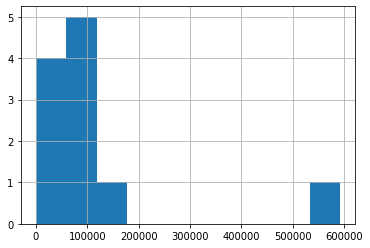

In [12]:
total_df.groupby('Region')['Total.0'].sum().hist()

In [13]:
#Añadimos las columnas de muertes totales del 2010 al 2021 (Todos, hombres, mujeres, No especificados)
total_df["Totales_2010-2021"]= total_df['Total.0']+total_df['Total.1']+total_df['Total.2']+total_df['Total.3']+total_df['Total.4']+total_df['Total.5']+total_df['Total.6']+total_df['Total.7']+total_df['Total.8']+total_df['Total.9']+total_df['Total.10']+total_df['Total.11']
total_df["Hombres_2010-2021"]= total_df['Hombres.0']+total_df['Hombres.1']+total_df['Hombres.2']+total_df['Hombres.3']+total_df['Hombres.4']+total_df['Hombres.5']+total_df['Hombres.6']+total_df['Hombres.7']+total_df['Hombres.8']+total_df['Hombres.9']+total_df['Hombres.10']+total_df['Hombres.11']
total_df["Mujeres_2010-2021"]= total_df['Mujeres.0']+total_df['Mujeres.1']+total_df['Mujeres.2']+total_df['Mujeres.3']+total_df['Mujeres.4']+total_df['Mujeres.5']+total_df['Mujeres.6']+total_df['Mujeres.7']+total_df['Mujeres.8']+total_df['Mujeres.9']+total_df['Mujeres.10']+total_df['Mujeres.11']

In [14]:
total_df.columns

Index(['Entidad federativa', 'Total.0', 'Hombres.0', 'Mujeres.0',
       'No especificado.0', 'Total.1', 'Hombres.1', 'Mujeres.1',
       'No especificado.1', 'Total.2', 'Hombres.2', 'Mujeres.2',
       'No especificado.2', 'Total.3', 'Hombres.3', 'Mujeres.3',
       'No especificado.3', 'Total.4', 'Hombres.4', 'Mujeres.4',
       'No especificado.4', 'Total.5', 'Hombres.5', 'Mujeres.5',
       'No especificado.5', 'Total.6', 'Hombres.6', 'Mujeres.6',
       'No especificado.6', 'Total.7', 'Hombres.7', 'Mujeres.7',
       'No especificado.7', 'Total.8', 'Hombres.8', 'Mujeres.8',
       'No especificado.8', 'Total.9', 'Hombres.9', 'Mujeres.9',
       'No especificado.9', 'Total.10', 'Hombres.10', 'Mujeres.10',
       'No especificado.10', 'Total.11', 'Hombres.11', 'Mujeres.11',
       'No especificado.11', 'Region', 'Totales_2010-2021',
       'Hombres_2010-2021', 'Mujeres_2010-2021'],
      dtype='object')

In [15]:
#Intercambiamos el orden de las columnas, para que las recien añadidas aparezcan al inicio
#creamos la lista de los titulos en el orden
cols=['Entidad federativa', 'Region', 'Totales_2010-2021',
       'Hombres_2010-2021', 'Mujeres_2010-2021',
       'Total.0', 'Hombres.0', 'Mujeres.0', 'No especificado.0', 'Total.1',
       'Hombres.1', 'Mujeres.1', 'No especificado.1', 'Total.2', 'Hombres.2',
       'Mujeres.2', 'No especificado.2', 'Total.3', 'Hombres.3', 'Mujeres.3',
       'No especificado.3', 'Total.4', 'Hombres.4', 'Mujeres.4',
       'No especificado.4', 'Total.5', 'Hombres.5', 'Mujeres.5',
       'No especificado.5', 'Total.6', 'Hombres.6', 'Mujeres.6',
       'No especificado.6', 'Total.7', 'Hombres.7', 'Mujeres.7',
       'No especificado.7', 'Total.8', 'Hombres.8', 'Mujeres.8',
       'No especificado.8', 'Total.9', 'Hombres.9', 'Mujeres.9',
       'No especificado.9', 'Total.10', 'Hombres.10', 'Mujeres.10',
       'No especificado.10', 'Total.11', 'Hombres.11', 'Mujeres.11',
       'No especificado.11']

#cambiamos el df al nuevo orden de columna       
total_df=total_df[cols]
total_df

,Entidad federativa,Region,Totales_2010-2021,Hombres_2010-2021,Mujeres_2010-2021,Total.0,Hombres.0,Mujeres.0,No especificado.0,Total.1,...,Mujeres.9,No especificado.9,Total.10,Hombres.10,Mujeres.10,No especificado.10,Total.11,Hombres.11,Mujeres.11,No especificado.11
1,Total,Republica mexicana,8766193,4959890,3800627,592018,332027,259669,322,590693,...,325126,473,1086743,639277,446709,757,1122249,646825,474689,735
2,Aguascalientes,Centronorte,76425,42144,34253,5177,2721,2449,7,4934,...,3033,3,9548,5578,3968,2,9712,5457,4255,0
3,Baja California,Noroeste,234384,145094,89138,15400,9561,5822,17,14922,...,7837,1,32662,20190,12458,14,28596,17937,10655,4
4,Baja California Sur,Noroeste,41337,25079,16251,2434,1478,954,2,2602,...,1435,1,4867,2924,1943,0,5925,3605,2320,0
5,Campeche,Sureste,59199,34002,25150,3820,2231,1587,2,3736,...,2195,1,7549,4430,3118,1,7509,4280,3225,4
6,Coahuila de Zaragoza,Noreste,212858,118629,94111,14593,8159,6432,2,14640,...,8059,5,28190,16034,12149,7,23814,13362,10447,5
7,Colima,Oeste,53798,32388,21390,3223,1888,1334,1,3514,...,1792,0,6057,3694,2363,0,7121,4271,2849,1
8,Chiapas,Suroeste,327569,180982,146510,21721,12088,9631,2,21199,...,12935,8,38908,22400,16503,5,39865,22329,17532,4
9,Chihuahua,Noroeste,305974,183484,122243,25809,16861,8898,50,24121,...,10118,4,39246,23657,15579,10,31716,18592,13110,14
10,Ciudad de México,Centrosur,799642,423449,376069,55106,28098,26998,10,54629,...,30308,2,107292,61938,45353,1,100363,55694,44664,5


In [40]:
total_df.describe()

,Totales_2010-2021,Hombres_2010-2021,Mujeres_2010-2021,Total.0,Hombres.0,Mujeres.0,No especificado.0,Total.1,Hombres.1,Mujeres.1,...,Mujeres.9,No especificado.9,Total.10,Hombres.10,Mujeres.10,No especificado.10,Total.11,Hombres.11,Mujeres.11,No especificado.11
count,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000
mean,5.009253e+05,2.834223e+05,2.171787e+05,33829.600000,18972.971429,14838.228571,18.400000,33753.885714,19008.342857,14712.457143,...,18578.628571,27.028571,6.209960e+04,36530.114286,25526.228571,43.257143,6.412851e+04,36961.428571,27125.085714,42.000000
std,1.456343e+06,8.234267e+05,6.320694e+05,98317.621281,55091.188611,43185.349372,53.991394,98123.090100,55210.159900,42826.581268,...,54037.520536,95.884884,1.808509e+05,106382.763886,74354.069295,163.186891,1.866545e+05,107537.977534,79006.588979,155.962665
min,1.449700e+04,1.011000e+04,4.384000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,445.000000,0.000000,1.107000e+03,793.000000,312.000000,0.000000,1.661000e+03,1146.000000,515.000000,0.000000
25%,1.027355e+05,5.811350e+04,4.475700e+04,6949.500000,3960.000000,3075.500000,2.000000,6971.000000,4023.500000,3001.000000,...,3703.500000,1.000000,1.312550e+04,8307.500000,5430.500000,1.000000,1.304050e+04,8066.000000,5664.500000,1.000000
50%,2.032040e+05,1.186290e+05,8.640900e+04,14593.000000,8159.000000,5839.000000,5.000000,14640.000000,8345.000000,5835.000000,...,7336.000000,2.000000,2.442700e+04,14443.000000,10400.000000,3.000000,2.510600e+04,14515.000000,10447.000000,4.000000
75%,3.349500e+05,1.892685e+05,1.468630e+05,23639.000000,13410.500000,9833.500000,13.500000,23998.000000,13808.500000,9697.000000,...,12568.500000,4.000000,3.907700e+04,23028.500000,16041.000000,7.000000,4.274550e+04,24325.000000,18411.500000,5.500000
max,8.766193e+06,4.959890e+06,3.800627e+06,592018.000000,332027.000000,259669.000000,322.000000,590693.000000,332646.000000,257468.000000,...,325126.000000,473.000000,1.086743e+06,639277.000000,446709.000000,757.000000,1.122249e+06,646825.000000,474689.000000,735.000000


#Estadistica
Calcularemos el promedio de cada año y se comparara por año

<Axes: xlabel='Region'>

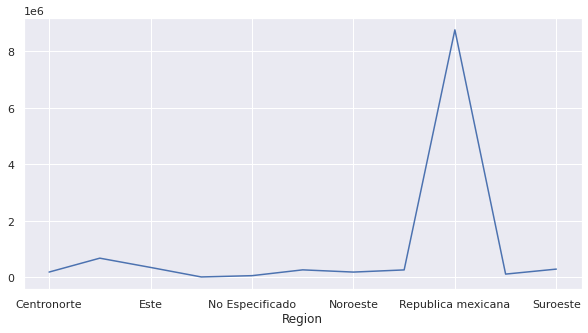

In [86]:
total_df.groupby('Region')['Totales_2010-2021'].agg('mean').plot(figsize=(10,5))

In [94]:
col_name=[]
for i in cols[3:]:
  col_name.append("" + i + "")

col_name

['Hombres_2010-2021',
 'Mujeres_2010-2021',
 'Total.0',
 'Hombres.0',
 'Mujeres.0',
 'No especificado.0',
 'Total.1',
 'Hombres.1',
 'Mujeres.1',
 'No especificado.1',
 'Total.2',
 'Hombres.2',
 'Mujeres.2',
 'No especificado.2',
 'Total.3',
 'Hombres.3',
 'Mujeres.3',
 'No especificado.3',
 'Total.4',
 'Hombres.4',
 'Mujeres.4',
 'No especificado.4',
 'Total.5',
 'Hombres.5',
 'Mujeres.5',
 'No especificado.5',
 'Total.6',
 'Hombres.6',
 'Mujeres.6',
 'No especificado.6',
 'Total.7',
 'Hombres.7',
 'Mujeres.7',
 'No especificado.7',
 'Total.8',
 'Hombres.8',
 'Mujeres.8',
 'No especificado.8',
 'Total.9',
 'Hombres.9',
 'Mujeres.9',
 'No especificado.9',
 'Total.10',
 'Hombres.10',
 'Mujeres.10',
 'No especificado.10',
 'Total.11',
 'Hombres.11',
 'Mujeres.11',
 'No especificado.11']

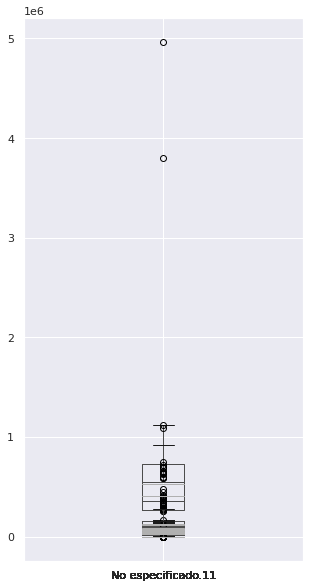

In [95]:
#Querriamos graficar todas y mostrarlas a la vez, pero falle
for name in col_name:
  pd.DataFrame(total_df.groupby('Region')[name].sum()).boxplot()

In [43]:
total_df.groupby('Region')['Totales_2010-2021'].sum()#.plot(figsize=(20,5))

Region
Centronorte            936039
Centrosur             2038843
Este                  1407520
Extranjero              14497
No Especificado         59689
Noreste                796528
Noroeste              1120865
Oeste                 1054203
Republica mexicana    8766193
Sureste                461536
Suroeste               876473
Name: Totales_2010-2021, dtype: int64

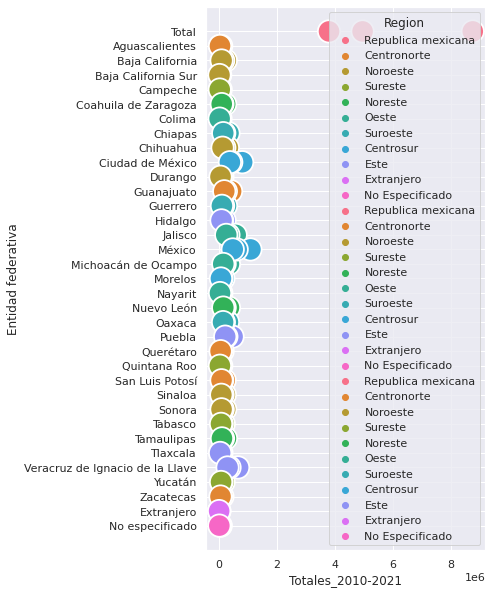

In [37]:
sns.scatterplot(x=total_df['Totales_2010-2021'],y=total_df['Entidad federativa'], hue=total_df['Region'], s=500)
sns.set(rc={'figure.figsize':(5,10)})




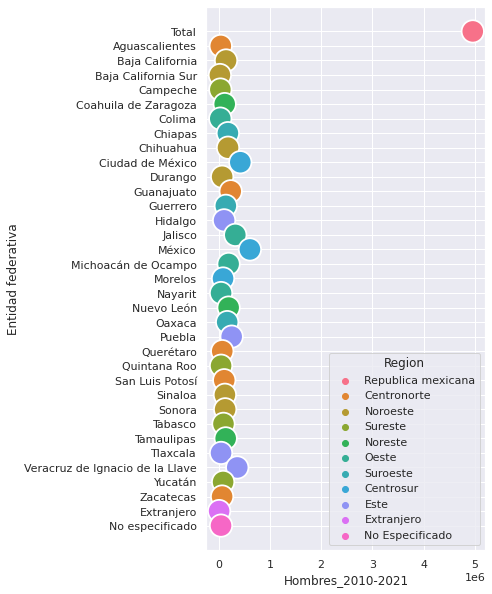

In [39]:
sns.scatterplot(x=total_df['Hombres_2010-2021'],y=total_df['Entidad federativa'], hue=total_df['Region'], s=500)
sns.set(rc={'figure.figsize':(5,10)})



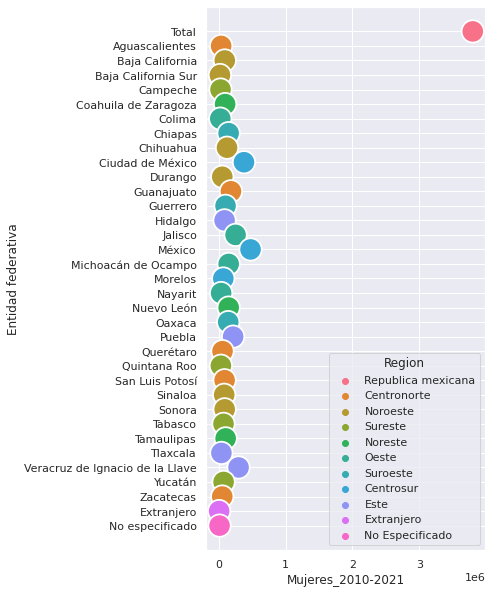

In [38]:
sns.scatterplot(x=total_df['Mujeres_2010-2021'],y=total_df['Entidad federativa'], hue=total_df['Region'], s=500)
sns.set(rc={'figure.figsize':(5,10)})